In [1]:
import numpy as np
import itertools
import random
from statistics import stdev
import math
import ast

In [2]:

p_running = 0.9
p_failure = 1 - p_running
path = '/home/dkabe/SC_Resilience/SAA_Analysis_v7/Instance_2/'

In [3]:
N = [64, 128, 192, 256, 320, 384]
batches = 30
Products = 3
Market = 29
text_file = open(path + 'Disruption_scenarios.txt', "r")
ls = text_file.read().split('\n')[:-1]
Scenarios = list(map(lambda x: ast.literal_eval(x), ls))
Probabilities = np.loadtxt(path + "disruption_probabilities.txt")
num_disruption = len(Scenarios)

In [4]:
p1_mean = 137000
p2_mean = 135000
p3_mean = 133000

p1_sd = 2650
p2_sd = 8125
p3_sd = 4000

distribution_mat = [[p1_mean, p1_sd],
                  [p2_mean, p2_sd],
                  [p3_mean, p3_sd]]

In [5]:
np.random.seed(2)
nominal_demand = np.zeros((Products, Market))
for m in range(Products):
    nominal_demand[m] = np.round(np.random.normal(distribution_mat[0][0], distribution_mat[0][1], size = 29))
    nominal_demand[m] = np.round(np.random.normal(distribution_mat[1][0], distribution_mat[1][1], size = 29))
    nominal_demand[m] = np.round(np.random.normal(distribution_mat[2][0], distribution_mat[2][1], size = 29))

In [6]:
delta = np.arange(0.75, 1.255, 0.005)

In [7]:
demand_realization = len(delta)


In [9]:
random.seed(2)
demand = np.zeros((demand_realization, Products, Market))
for r in range(demand_realization):
    demand[r] = delta[r]*nominal_demand

In [10]:
S = demand_realization*Scenarios
S_demand = []
S_prob = list(Probabilities)*demand_realization
multiplier = sum(S_prob)
S_prob = list(map(lambda x: x/multiplier, S_prob))
for r in range(demand_realization):
    S_demand+=([demand[r]]*num_disruption)

In [13]:
list(set(S_prob))

[4.2620515841642346e-05,
 7.217821782188064e-10,
 9.900990099023399e-13,
 0.0003835846425747812,
 8.019801980208958e-11,
 8.910891089121062e-12,
 4.735612871293593e-06,
 0.003452261783173032,
 5.261792079215101e-07,
 6.496039603969258e-09,
 5.846435643572334e-08]

In [23]:
np.random.seed(2)
evaluation_indices = np.random.choice(range(len(S)), 10000, p = S_prob)
evaluation_set = [S[index] for index in evaluation_indices]
evaluation_demand = np.array([S_demand[index] for index in evaluation_indices])
with open(path + 'Evaluation_Set.txt', 'w+') as f:
    for item in evaluation_set:
        f.write("%s\n" % item)
f.close()
np.savetxt(path + "eval_set_demand.txt", evaluation_demand.reshape((10000*3,29)))

In [14]:
path

'/home/dkabe/Model_brainstorming/SAA_Analysis_v6/Instance_2/'

In [24]:
#random.seed(2)
np.random.seed(2)
for num_scen in N:
    for batch in range(batches):
        indices = np.random.choice(range(len(S)), num_scen, p = S_prob)
        sample_scenarios = [S[index] for index in indices]
        demand = np.array([S_demand[index] for index in indices])
        with open(path + 'Scenarios/' + str(num_scen) + '_' + str(batch) + '.txt', 'w+') as f:
            for item in sample_scenarios:
                f.write("%s\n" % item)
        f.close()
        np.savetxt(path + 'Scen_demand/' + 'demand_' + str(num_scen) + '_' + str(batch) + '.txt', demand.reshape((num_scen*Products, Market)))

In [18]:
# version 2
batches=30
path = '/home/dkabe/SC_Resilience/SAA_Analysis_v7/Instance_2/'
N = [64, 128, 192, 256, 320, 384]
for scen in N:
    gaps = []
    ub_averages = []
    ub_max = []
    objvals_lb = np.loadtxt(path + "Objectives/" + str(scen) + '_results.txt')
    avg_lb = (np.mean(objvals_lb))
    std_lb = (stdev(objvals_lb))
    lbwidth = std_lb/math.sqrt(batches)*2.045
    lbmin = round(avg_lb - lbwidth,2)
    #print(avg_lb, lbmin)
    #print('ci on lower bound = [', round(avg_lb-lbwidth,2), ',', round(avg_lb+lbwidth,2), ']')
    for batch in range(batches):
        objvals_ub = np.loadtxt(path + "Upper_Bounds/" + str(scen) + "_scenarios/" + str(scen) + "_" + str(batch) + "_UB_results.txt")
        objvals_ub = random.sample(list(objvals_ub), 10000)
        avg_ub = (np.mean(objvals_ub))
        std_ub = stdev(objvals_lb)
        ubwidth = std_ub/math.sqrt(10000)*1.96
        ubmax = round(avg_ub + ubwidth, 2)
        gap = round(100*((ubmax - lbmin)/lbmin),2)
        ub_averages.append(avg_ub)
        gaps.append(gap)
        ub_max.append(ubmax)
    #min_gap = min(filter(lambda x: x >= 0, gaps))
    min_gap = min(gaps)
    index = gaps.index(min_gap)
    #print(ub_averages[index], ub_max[index], min_gap)
    print(avg_lb, "\t", ub_averages[index], "\t", lbmin, "\t", ub_max[index], "\t", min_gap, "\t")

18299598.841666665 	 18879316.523106 	 18019661.39 	 18894012.02 	 4.85 	
18573639.854333334 	 18879316.523106 	 18382379.56 	 18889356.86 	 2.76 	
18753761.070666663 	 18879316.523106 	 18596890.89 	 18887551.53 	 1.56 	
18810684.27766667 	 18879316.523106 	 18662278.37 	 18887107.19 	 1.2 	
18742354.325000003 	 18879316.523106 	 18615574.6 	 18885971.91 	 1.45 	
18855796.759666666 	 18951629.325280998 	 18740337.54 	 18957690.43 	 1.16 	


In [16]:
std_ub

309240.19639346097

In [14]:
indices = np.random.choice(range(len(S)), 192, p = S_prob)
sample_scenarios = [S[index] for index in indices]
demand = np.array([S_demand[index] for index in indices])
with open("/home/dkabe/SC_Resilience/Input_Data/Realistic/Instance_2/scen_2.txt", 'w+') as f:
    for item in sample_scenarios:
        f.write("%s\n" % item)
f.close()
np.savetxt("/home/dkabe/SC_Resilience/Input_Data/Realistic/Instance_2/Demand_2.txt", demand.reshape((192*Products, Market)))

In [231]:
sum(eval_probabilities)

1.0000000000000158

[4.87, 3.59, 3.59]

In [32]:
x = np.loadtxt("/home/dkabe/SC_Resilience/SAA_Analysis_v7/Instance_2/Objectives/384_results.txt")

In [30]:
import matplotlib.pyplot as plt

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        2., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18342495.4   , 18349360.0654, 18356224.7308, 18363089.3962,
        18369954.0616, 18376818.72

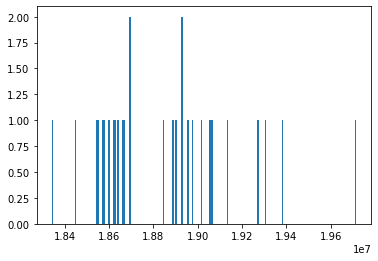

In [51]:
plt.hist(x,bins=200)

In [36]:
np.mean([ 2.2, 2.2, 1.1, 2.2, 2.2, 3.3, 3.3, 2.2, 3.3, 3.3])


2.5300000000000002

In [54]:
elements = [1.1, 2.2, 3.3]
probabilities = [0.2, 0.5, 0.3]
sample = np.random.choice(elements, 100, p=probabilities)


In [55]:
np.mean(sample)

2.134

In [50]:
sum(np.array(elements)*np.array(probabilities))

2.31